In [1]:
import plotting as apl
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib


In [112]:
data_sync = apl.DataSph('/data/RIS/cyuran/Active/giantflares/Nicholas/Aperture4/data/magnetar_sync')
data_nokt = apl.DataSph('/data/RIS/cyuran/Active/giantflares/Nicholas/Aperture4/data/magnetar_nokt')
data_short = apl.DataSph('/data/RIS/cyuran/Active/giantflares/Nicholas/Aperture4/data/magnetar_short')
data_noinit = apl.DataSph('/data/RIS/cyuran/Active/giantflares/Nicholas/Aperture4/data/magnetar')
data_noinit.fld_steps[-1]

7

star_kT -> 5e-3 (2.5keV) (5times)
remove synch_cool\
lower twist_rmax_2 -> 2
ph_flux__binenergy ->128
maxstep->80
output_interval

In [111]:
data_kT._conf

{'log_level': 0,
 'num_species': 2,
 'ion_mass': 1.0,
 'max_ptc_num': 600000000,
 'max_ph_num': 600000000,
 'ptc_buffer_size': 5000000,
 'ptc_segment_size': 20000000,
 'ph_buffer_size': 5000000,
 'ph_segment_size': 20000000,
 'max_tracked_num': 6000000,
 'dt': 0.0001,
 'q_e': 1.0,
 'current_smoothing': 3,
 'use_pml': False,
 'use_implicit': False,
 'output_dir': '../../../data/magnetar',
 'max_steps': 800000,
 'fld_output_interval': 4000,
 'ptc_output_interval': 4000,
 'tracked_fraction': 0.01,
 'snapshot_interval': 40000,
 'sort_interval': 23,
 'N': [2048, 2048],
 'ranks': [2, 2],
 'guard': [2, 2],
 'lower': [0.0, 0.0],
 'size': [3.141593, 3.141593],
 'periodic_boundary': [False, False],
 'damping_boundary': [False, False, False, False],
 'downsample': 2,
 'momentum_downsample': 4,
 'compute_first_moments': True,
 'compute_second_moments': True,
 'B_Q': 5000.0,
 'Bp': 50000.0,
 'kT': 0.01,
 'ppc': 10,
 'rho0': 100.0,
 'ph_num_bins': 128,
 'sync_spec_lower': 1e-08,
 'sync_spec_upper': 

In [115]:
step = 7
data_nokt.load(step)
data_short.load(step)
data_noinit.load(step)
print(f"{len(data_nokt.tracked_ptc_id):.2e}",f"{len(data_nokt.tracked_ph_id):.2e}")
print(f"{len(data_short.tracked_ptc_id):.2e}",f"{len(data_short.tracked_ph_id):.2e}")
print(f"{len(data_noinit.tracked_ptc_id):.2e}",f"{len(data_noinit.tracked_ph_id):.2e}")


1.49e+06 2.72e+06
1.51e+06 2.76e+06
7.46e+05 3.01e+05


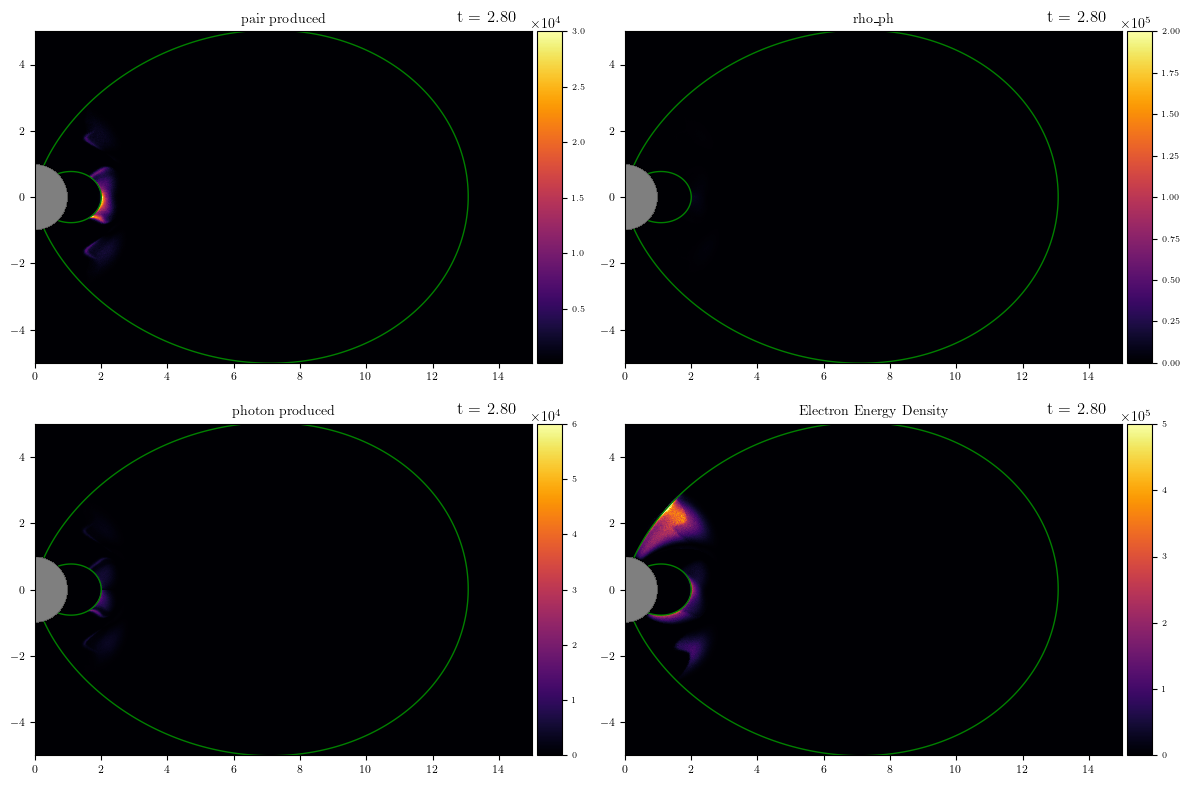

In [113]:
afig = apl.apt_fig(data_noinit)
step = 7
plt.ioff()
afig.add_colorplot("pair",lambda data: data.pair_produced
                   ,cmap = "inferno"
                   ,title = "pair produced"
                   ,vmin = 1e2,vmax =3e4)

afig.add_colorplot("ph", lambda data: data.Rho_ph
                   ,pos = (0,1),cmap = "inferno"
                   ,title = f"rho_ph"
                   ,vmin=0,vmax=2e5)
afig.add_colorplot("ph_pr", lambda data: data.photon_produced
                   ,pos = (1,0), cmap = "inferno"
                   ,title = "photon produced"
                   ,vmin=0,vmax=6e4)

afig.add_colorplot("e_E", lambda data: data.stress_e00
                   ,pos = (1,1), cmap = "inferno"
                   ,title = "Electron Energy Density"
                     ,vmin=0,vmax=5e5)


afig.add_parameters("all",xlim = (0,15),ylim=(-5,5)
                    ,ctick_fontsize=6, tick_fontsize=8, label_fontsize=8,title_fontsize=10
                    )

afig.set_step("all",step)
afig.set_size(12,8)
# afig.set_step(["ph_sync","pair_sync","ph_pr_sync"],step*4) # since cooling data saves 4 times more frequently
afig.add_post("draw_field_line","all", r_max = [13,2])
# afig.add_post("draw_field_line",["pair","ph","ph_pr","e"], r_max = [13,2])
# afig.add_post("draw_field_line",["pair_sync","ph_pr_sync","ph_pr_sync","e_sync"], r_max = [13,4])
afig.add_post("draw_time","all",text_fontsize=12, color="black",text_x = 0.85,text_y=1.03)
afig.add_post("draw_NS","all")
afig.make_fig()
# afig.make_movie(save_name = "photons")

pitch angle of electrons to magnetic field (in problematic area, will synchotron cooling decrease it?)
compare sync_loss to ElectronEnergy see if Energy loss is significant
change Kt to zero in the config or in the main.cpp

In [48]:
def res_ph_lineout_plot(apt_plot_object, **kwargs):
    '''
    currently needs to be made with apt_plot and then _add_plot
    Any parameters need to be added to the apt_plot_object.parameters
    The res_ph_lineout_plot will show the emitted photon spectra from the 
    resonant scattering scheme along a specific theta angle.
    Will require photon_flux_lower/upper in the config
    and resonant_ph_flux in the data keys
    '''
    ap = apt_plot_object
    data = ap.data
    ax = ap.ax
    #kwargs.setdefault (rasterized???)
    #accessing the ranges of the output photon flux structured as (energy,theta)
    lower_e = data._conf['ph_flux_lower'][0]
    upper_e = data._conf['ph_flux_upper'][0]
    lower_theta = data._conf['ph_flux_lower'][1]
    upper_theta = data._conf['ph_flux_upper'][1]

    #creating the meshgrid for the energy and theta values
    X1 = np.exp(np.linspace(np.log10(lower_e), np.log10(upper_e), num=data.resonant_ph_flux.shape[3])*np.log(10))
    Y1 = np.linspace(lower_theta*180/np.pi, upper_theta*180/np.pi, num=data.resonant_ph_flux.shape[2])
    X1, Y1 = np.meshgrid(X1, Y1)

        
    flux_data = (1e-13+np.sum(data.resonant_ph_flux, axis=(0,1)))
    theta = kwargs.get('theta', [90]) # degrees
    
    if type(theta) is not list:
        theta = [theta]
    th_index = []
    for th in theta:
        th_index.append(np.argmin(np.abs(Y1[:,0]-th)))
    E_vals = X1[0,:]
    flux_at_th = []
    for i in th_index:
        flux_at_th.append(flux_data[i,:])
    # th_slice = flux_data[th_index,:]

    ap.parameters.setdefault('xscale',"log")
    ap.parameters.setdefault('yscale',"log")
    ylim = ap.parameters.get('ylim', None)
    labels = kwargs.get('labels', None)
    if hasattr(ap, 'linemade'):
        #for when I allow multiple lineouts on the same plot
        for i, line in enumerate(ap.plot_object):
            # line.set_data(E_vals, th_slice)
            line.set_offsets(np.array([E_vals, flux_at_th[i]]).T)
        return ap.plot_object
    else:
        plot_object = []
        for i in range(len(theta)):
            label = labels[i] if labels is not None else f"theta = {theta[i]:.2f}\u00B0"
            line = ax.plot(E_vals,E_vals*flux_at_th[i],label=label)
            plot_object.append(line)
        if ylim is not None:
            ax.set_ylim(ylim)
        ax.legend()
        ap.linemade = True
        # ax.set_aspect('equal')
        # print(type(line))
        return plot_object


In [44]:
def res_ph_plot(apt_plot_object, **kwargs):
    '''
    The res_ph_lineout_plot will show the emitted photon spectra from the 
    resonant scattering scheme along a specific theta angle.
    Will require photon_flux_lower/upper in the config
    and resonant_ph_flux in the data keys
    '''
    ap = apt_plot_object
    data = ap.data
    ax = ap.ax
    #kwargs.setdefault (rasterized???)

    # params = match_param(kwar)


    #accessing the ranges of the output photon flux structured as (energy,theta)
    lower_e = data._conf['ph_flux_lower'][0]
    upper_e = data._conf['ph_flux_upper'][0]
    lower_theta = data._conf['ph_flux_lower'][1]
    upper_theta = data._conf['ph_flux_upper'][1]

    #creating the meshgrid for the energy and theta values
    X1 = np.exp(np.linspace(np.log10(lower_e), np.log10(upper_e), num=data.resonant_ph_flux.shape[3])*np.log(10))
    Y1 = np.linspace(lower_theta*180/np.pi, upper_theta*180/np.pi, num=data.resonant_ph_flux.shape[2])
    X1, Y1 = np.meshgrid(X1, Y1)

    flux_data = (1e-13+np.sum(data.resonant_ph_flux, axis=(0,1)))
    
    ap.parameters.setdefault('xscale',"log")
    # ap.parameters.setdefault('yscale',"log")
    
    if hasattr(ap, 'plotmade'):
        #for when I allow multiple lineouts on the same plot
        # for i, line in enumerate(ap.plot_object):
        #     line.set_data(E_vals, th_slice)
        ap.plot_object.set_array(flux_data)
    else:
        vmin =  kwargs.get('vmin',1e-5)
        vmax = kwargs.get('vmax',1e5)
        c = ax.pcolormesh(X1,Y1,flux_data,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
        ap.plotmade = True
        if ap.parameters.get("include_colorbar",True):
            divider = apl.make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = plt.colorbar(c, cax=cax)
            #saves the cbar object to the apt_plot object if needed to be used
            ap.cbar = cbar
        return c


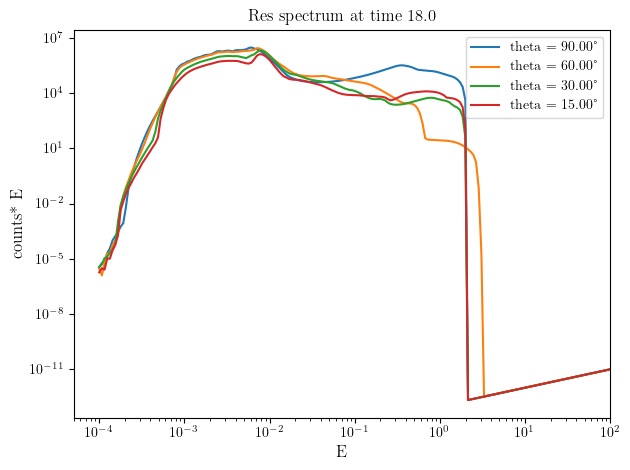

In [50]:
data=data_sync

step = 180

afig = apl.apt_fig(data,"afig")
spec_pl_obj_lineout = apl.apt_plot("spectrum_lineout",None, data
                                   , plot_function=res_ph_lineout_plot
                                   , theta=[90,60,30,15]
                                
)
afig._add_plot("spectrum_lineout",spec_pl_obj_lineout
               )
afig.add_parameters("all"
                    # ,ylim=(1e-2,1e10),xlim=(1e-5,1e1)
                    ,ylabel = "counts* E",xlabel = "E "
                    ,xlim = (5e-5,1e2)
                    ,title = f"Res spectrum at time {step/10}"
)
# afig.set_size(7,5)
afig.set_step("all",step)
afig.make_fig(legend_fontsize=10,tick_fontsize=10,label_fontsize=12,title_fontsize=12)


In [ ]:
plt.ioff()
step = 200
data=data_sync
bfig = apl.apt_fig(data,"bfig",suptitle=f"at step{step}")

Rho = lambda data: data.Rho_e + data.Rho_p
bfig.add_colorplot("Rho", Rho
                   ,vmin = -1000, vmax = 1000
                    , title = f"Charge Density at step {step}"
                   )

bfig.add_colorplot("B3", "EdotB"
                #     ,vmin = -200, vmax = 200
                    ,title = f"$B_3$ at step {step}"
                   )

bfig.add_parameters(["Rho","B3"]
                    , xlim = (0,10), ylim = (-5,5)
                    )

bfig.add_post(["draw_field_lines1","draw_NS"], add_to = ["Rho","B3"])

spec_pl_obj_lineout = apl.apt_plot("spectrum_lineout",None, data
                                   , plot_function=res_ph_lineout_plot, theta=90
                           ,ylim = (1e1,1e10),title = "spectrum along equatorial line of sight"
               )
bfig._add_plot("spectrum_lineout",spec_pl_obj_lineout
               ,pos = (1,0), colspan = 2
               )
bfig.set_size(17,15)
bfig.add_parameters("all", title_fontsize = 30)

bfig.set_step("all", step)
bfig.make_fig()
# bfig.make_movie("full_sim_spec",increment=10)

In [ ]:
bfig.update_fig(21)

In [ ]:
from tqdm.notebook import tqdm

fig, ax = plt.subplots()
max_es = []
steps = []
for step in range(len(max_es),data.ptc_steps[-1],1):
    if step%50 == 0:
        print("step",step)
    data.load(step)
    steps.append(step)
    max_es.append(np.max(data.tracked_ptc_E))

ax.scatter(steps,max_es,s=2)
ax.set_xlabel("Step")
ax.set_ylabel("Max Energy of ptcs")
plt.show()
# np.max(data.tracked_ptc_E)

In [ ]:
fig,ax = plt.subplots()
ax.scatter(steps,max_es,s=1)
ax.set_xlabel("Step")
ax.set_ylabel("Max Energy of ptcs")

ax.set_ylim(30,130)

# fig.savefig("twisted/max_energy.png")
plt.show()

In [73]:

data_mag._conf

{'log_level': 0,
 'num_species': 2,
 'ion_mass': 1.0,
 'max_ptc_num': 600000000,
 'max_ph_num': 600000000,
 'ptc_buffer_size': 5000000,
 'ptc_segment_size': 20000000,
 'ph_buffer_size': 5000000,
 'ph_segment_size': 20000000,
 'max_tracked_num': 6000000,
 'dt': 0.0001,
 'q_e': 1.0,
 'current_smoothing': 3,
 'use_pml': False,
 'use_implicit': False,
 'output_dir': '../../../data/magnetar',
 'max_steps': 800000,
 'fld_output_interval': 4000,
 'ptc_output_interval': 4000,
 'tracked_fraction': 0.01,
 'snapshot_interval': 40000,
 'sort_interval': 23,
 'N': [2048, 2048],
 'ranks': [2, 2],
 'guard': [2, 2],
 'lower': [0.0, 0.0],
 'size': [3.141593, 3.141593],
 'periodic_boundary': [False, False],
 'damping_boundary': [False, False, False, False],
 'downsample': 2,
 'momentum_downsample': 4,
 'compute_first_moments': True,
 'compute_second_moments': True,
 'B_Q': 5000.0,
 'Bp': 50000.0,
 'kT': 0.01,
 'ppc': 10,
 'rho0': 100.0,
 'ph_num_bins': 128,
 'sync_spec_lower': 1e-08,
 'sync_spec_upper': 

In [35]:
def convert_to_index(ax_index,value,data):
        # takes an x1,x2 (x3) value and converts it into an index on the grid
        lower = data.conf["lower"][ax_index]
        N = data.conf["N"][ax_index]
        downsample = data.conf["downsample"]
        size = data.conf["size"][ax_index]

        index = (value-lower)*N/(size*downsample)
        return int(index) # as its an index
    
# def index_from_pos(data,x,y, tol=1e-2):
#     ''' no longer necessary since we have data._rv and data._thetav
#     *sigh I lie because i still need to convert x,y to index'''
#     abs_diff_x = np.abs(data.x1 - x)
#     abs_diff_y = np.abs(data.x2 - y)

#     # Find the indices of the minimum values in the absolute difference arrays
#     x_index = np.min(abs_diff_x)
#     y_index = np.min(abs_diff_y)

    
#     mask_x = abs_diff_x < tol
#     mask_y = abs_diff_y <tol
#     comb_mask = mask_x | mask_y
#     common_indices = np.argwhere(mask_x & mask_y)
#     print(common_indices)

#     average_x_index = int(np.median(common_indices[:,0]))
#     average_y_index = int(np.median(common_indices[:,1]))
#     return average_x_index,average_y_index

def data_field_line(data, th_foot, fld_val, tol=1e-2,):
    from contourpy import contour_generator
    '''
      th_foot must be in radians
    '''
    assert callable(fld_val), "fld_val must be a lambda data: function"
    
    # compute flux which will be used to define the field line
    flux    = np.cumsum(data.B1 * data._rv * data._rv * np.sin(data._thetav) * data._dtheta, axis=0)

    # Find the index corresponding to the footpoint
    r = np.log(1) # we always start on the surface
    r_foot_index = convert_to_index(0,r,data)
    theta_foot_index = convert_to_index(1,th_foot,data)
    #Then we compute the flux at that point
    flux_foot = flux[theta_foot_index,r_foot_index] # yes these seem flipped but its the way it is

    # define the field line as a contour of that flux,
    # then we extract the path of the field line as a series of vertices
    with matplotlib.rc_context({'interactive':False}): # as plt.contour creates it's own figure
        fig, ax = plt.subplots()
        field_line = plt.contour(data.x1, data.x2, flux, levels=[flux_foot])
        plt.close(fig)
    
    # paths = field_line.collections[0].get_paths() #With one level we get one path
    paths = field_line.get_paths()
    vertices = paths[0].vertices
    
    data_on_fld_line = []
    for (x,y) in vertices:
        r =np.sqrt(x**2+y**2)
        theta = np.pi/2-np.arctan2(y,x)
        # print(r,theta,x,y)
        x_index = convert_to_index(0,np.log(r),data)
        y_index = convert_to_index(1,theta,data)
        # x_index,y_index = index_from_pos(data,x,y,tol)
        data_on_fld_line.append(fld_val(data)[y_index,x_index])
    return data_on_fld_line,vertices
def plot_data_fld_line(data, th_foot, fld_val, tol=1e-2):
    fld_line,vertices = data_field_line(data, th_foot, fld_val, tol)
    # distances = np.concatenate(([0], np.linalg.norm(vertices[1:]-vertices[:-1],axis=1)))
    def func(ax):
        ax.scatter(vertices[:,0],vertices[:,1],c=fld_line)
        ax.set_title(f"th_foot = {th_foot*180/np.pi:.2f}\u00B0")
    # c = ax.scatter(vertices[:,0],vertices[:,1],c=fld_line)
    return func
def integrate_data_fld_line(data, th_foot, fld_val,val_label = None,int_label=None, tol=1e-2):
    def func(ax):
        fld_line,vertices = data_field_line(data, th_foot, fld_val, tol)
        # print(np.shape(vertices))
        # c = ax.scatter(vertices[:,0],vertices[:,1],c=fld_line)
        import scipy.integrate as integrate
        # now I integreat the field_line defined at vertices
        # to get the total charge along the field line
        distances = np.concatenate(([0], np.linalg.norm(vertices[1:]-vertices[:-1],axis=1)))
        tot_distance = np.cumsum(distances)
        integral_cumulative = np.concatenate(([0],integrate.cumulative_trapezoid(y=fld_line,x=tot_distance)))
        xs = np.linspace(0,len(fld_line),len(fld_line))
        ax.scatter(tot_distance,fld_line,c =xs ,label = val_label,s=1)
        ax.legend(loc='center',bbox_to_anchor=(0.5, 0.6))
        ax.set_ylim(-1500,10)
        # ax.scatter(vertices[:,0],vertices[:,1],c=fld_line)
        ax.set_xlabel("Distance along field line")
        ax.set_ylabel("$E \\cdot B$")
        ax.set_title(f"$E \\cdot B$, th_foot = {th_foot*180/np.pi:.2f}\u00B0")
        if hasattr(ax, 'second_ax'):
             ax.second_ax.remove() # to work with updating
        ax.second_ax = ax.twinx()
        ax.second_ax.plot(tot_distance,integral_cumulative,label=int_label)
        ax.second_ax.set_ylabel(int_label)
        ax.second_ax.set_ylim(-375,2.5)
        # ax.set_ylim(-1,1)
        ax.second_ax.legend(loc='center',bbox_to_anchor=(0.5, 0.4))
    
    return func

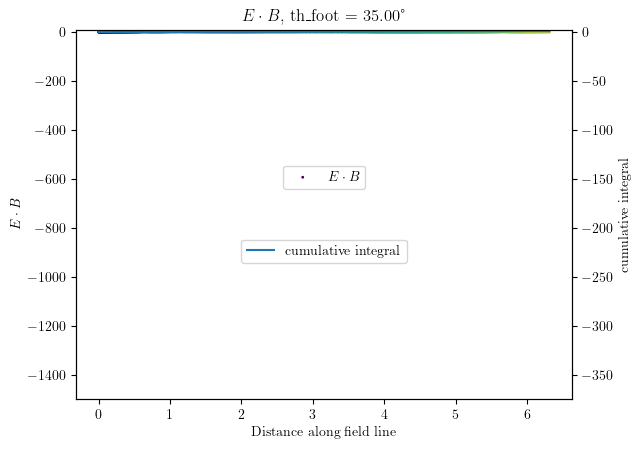

In [40]:
step = 100
data = data_sync
data.load(step)
plt.ioff()
th = 35*np.pi/180
import os
EdotB = lambda data: (data.B1*data.E1 + data.B2*data.E2 + data.B3*data.E3)/np.sqrt(data.B1**2 + data.B2**2 + data.B3**2)
thing = integrate_data_fld_line(data,th,EdotB,val_label = "$E \\cdot B$",int_label = "cumulative integral")
fig,ax = plt.subplots()
thing(ax)
plt.show(fig)
# for step in range(0,350,10):
#     data.load(step)
#     save_step = step // 10
#     fig,integral = integrate_data_fld_line(data,th,EdotB)
#     fig.savefig(f"movie_plots/{save_step:05d}.png")
#     plt.close(fig)
# save_name = "EdotB_along45"
# os.system(f"ffmpeg -y -loglevel error -r 10 -i movie_plots/%05d.png -c:v libx264 -vf fps=10 -pix_fmt yuv420p -threads 0 movies/{save_name}.mp4")
        


In [36]:
data_mag._conf

{'log_level': 0,
 'num_species': 2,
 'ion_mass': 1.0,
 'max_ptc_num': 600000000,
 'max_ph_num': 600000000,
 'ptc_buffer_size': 5000000,
 'ptc_segment_size': 20000000,
 'ph_buffer_size': 5000000,
 'ph_segment_size': 20000000,
 'max_tracked_num': 6000000,
 'dt': 0.0001,
 'q_e': 1.0,
 'current_smoothing': 3,
 'use_pml': False,
 'use_implicit': False,
 'output_dir': '../../../data/magnetar',
 'max_steps': 800000,
 'fld_output_interval': 4000,
 'ptc_output_interval': 4000,
 'tracked_fraction': 0.01,
 'snapshot_interval': 40000,
 'sort_interval': 23,
 'N': [2048, 2048],
 'ranks': [2, 2],
 'guard': [2, 2],
 'lower': [0.0, 0.0],
 'size': [3.141593, 3.141593],
 'periodic_boundary': [False, False],
 'damping_boundary': [False, False, False, False],
 'downsample': 2,
 'momentum_downsample': 4,
 'compute_first_moments': True,
 'compute_second_moments': True,
 'B_Q': 5000.0,
 'Bp': 50000.0,
 'kT': 0.01,
 'ppc': 10,
 'rho0': 100.0,
 'ph_num_bins': 128,
 'sync_spec_lower': 1e-08,
 'sync_spec_upper': 

2.4468644785960507e-07
Custom plot not set step


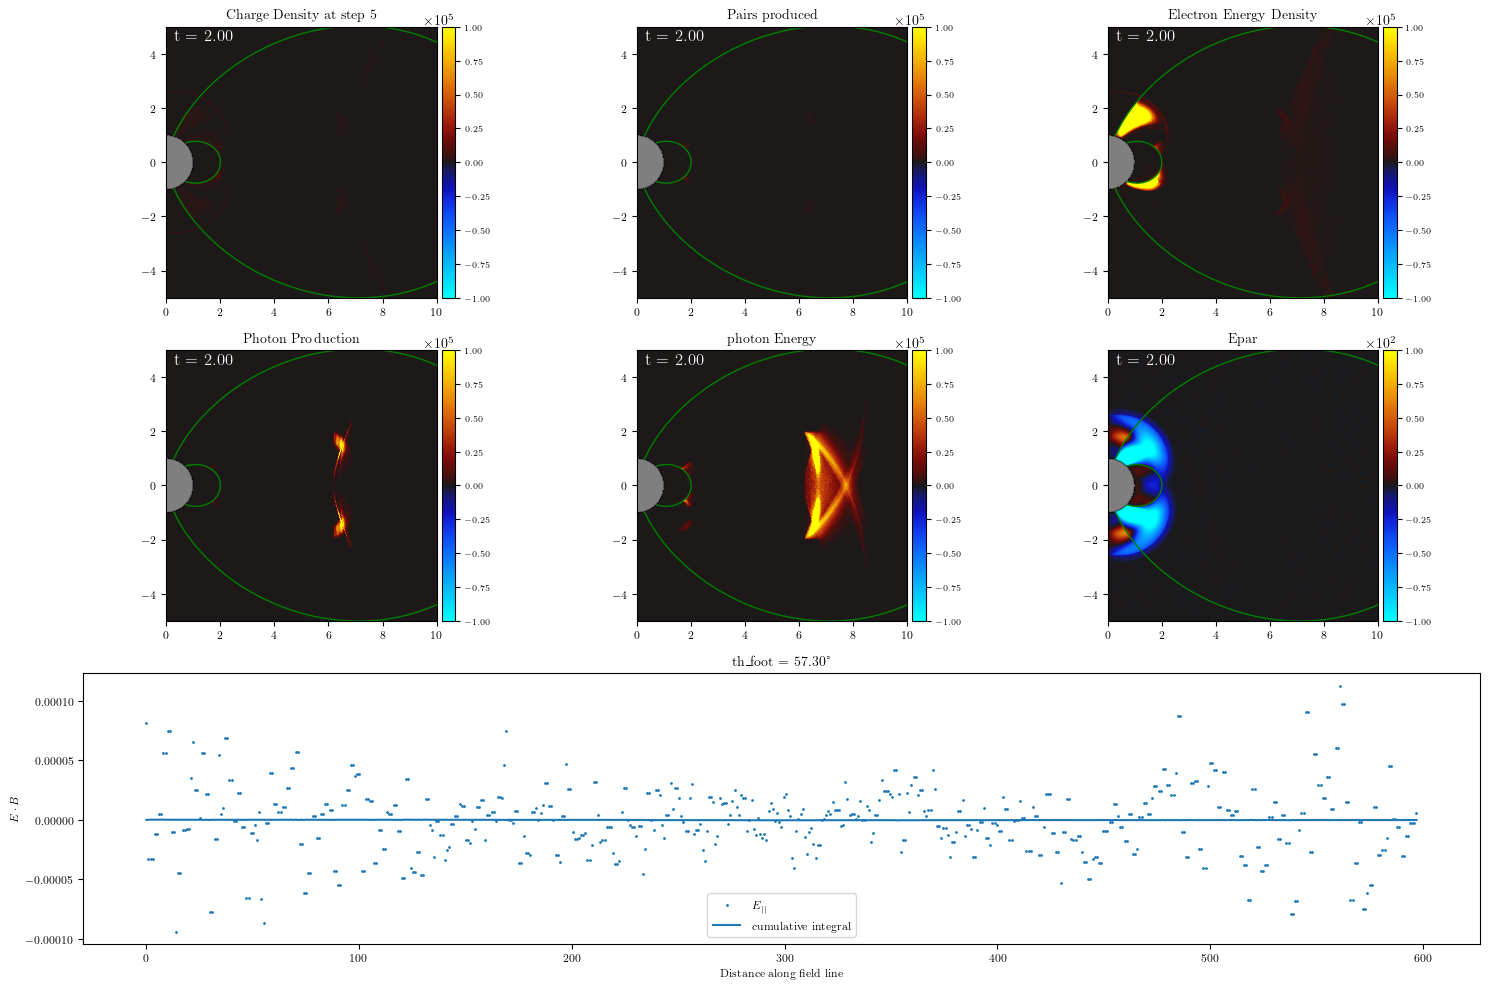

In [32]:
afig = apl.apt_fig(data_mag,"afig")
plt.ioff()
step =5
Rho = lambda data: (-data.Rho_e + data.Rho_p)*data._rv**3
# Rho = lambda data: data.stress_e00
Epar = lambda data: (data.E1*data.B1 + data.E2*data.B2 + data.E3*data.B3) / np.sqrt(data.B1**2 + data.B2**2 + data.B3**2)
afig.add_colorplot("Rho", Rho
                     ,vmin = -1e5, vmax = 1e5
                      , title = f"Charge Density at step {step}"
                     )
# afig.add_colorplot("B3", "B3"
#                    ,vmin = -200, vmax = 200
#                     ,title = f"$B_3$ at step {step}"
#                    )

afig.add_colorplot("ph_E", lambda data: data.stress_ph00, vmin = -1e5, vmax = 1e5,title = "photon Energy"
                   ,pos = (1,1))
afig.add_colorplot("gen_ph", lambda data: data.photon_produced, vmin = -1e5, vmax = 1e5
                   ,pos = (1,0), title = "Photon Production"
                   )
afig.add_colorplot("pairs", lambda data: data.pair_produced
                   ,vmin =-1e5,vmax=1e5
                    , title = "Pairs produced",pos = (0,1))
afig.add_colorplot("Electron E/Density", lambda data: data.stress_e00
                   ,vmin = -1e5, vmax = 1e5
                    , title = "Electron Energy Density"
                    # ,norm = matplotlib.colors.LogNorm(vmin=1e-5, vmax=1e5)
                    )
afig.add_colorplot("Epar", lambda data: data.B3
                   
                   ,vmin = -1e2, vmax = 1e2
                    , title = "Epar"
)
rmax = 8
th = np.arcsin(np.sqrt(1/rmax))*180/np.pi
th = 1
Epar_line = integrate_data_fld_line(data_mag,th,Epar,val_label = "$E_{||}$",int_label = "cumulative integral")
afig.add_own_plot("Epar_line",Epar_line,pos = (2,0),colspan=3)

afig.add_parameters("all", xlim = (0,10), ylim = (-5,5)
                    ,ctick_fontsize=6, tick_fontsize=8, label_fontsize=8,title_fontsize=10,legend_fontsize=8
                    )



colorplots = ["Rho","ph_E","gen_ph","pairs","Electron E/Density","Epar"]
afig.add_post("draw_field_line",colorplots,r_max = [data_mag._conf["twist_rmax_1"],data_mag._conf["twist_rmax_2"]])
# afig.add_post("draw_field_line",colorplots,name="integrate",th_foot = th)
afig.add_post("draw_NS",colorplots)
afig.add_post("draw_time",colorplots,text_fontsize=12, color="white",text_x = 0.03,text_y=0.95)
afig.set_step("all",step)
afig.set_size(15,10)
afig.make_fig()

In [6]:
step =0
plt.ioff()
# data_mag.load(step)
bfig = apl.apt_fig(data_mag,"bfig")
Epar = lambda data: (data.E1*data.B1 + data.E2*data.B2 + data.E3*data.B3) / np.sqrt(data.B1**2 + data.B2**2 + data.B3**2)
bfig.add_colorplot("Rho", Epar
                     ,vmin = -1e2, vmax = 1e2
                     ,xlim = (0,10), ylim = (-3.5,3.5)
                      , title = f"Epar {step}"
                     )

# bfig.del_plot("Rho")
rmax = 5.5
th = np.arcsin(np.sqrt(1/rmax))
# print(th)
Epar_line = integrate_data_fld_line(data_mag,th,Epar,val_label = "$E_{||}$",int_label = "cumulative integral")
bfig.add_own_plot("Epar_line",Epar_line,pos = (1,0),step=step,colspan=2)
bfig.set_size(10,10)
bfig.set_step("all",step)

bfig.add_post("draw_field_line","Rho",th_foot = th,color="red")
bfig.add_post("draw_field_line","Rho",name="pt2",r_max = [2,13])
bfig.add_parameters("all"
                    ,ctick_fontsize=6, tick_fontsize=8, label_fontsize=8,title_fontsize=10,legend_fontsize=8
                    )
bfig.make_fig()
bfig.make_movie(save_name="EdotB_field_line")

Custom plot not set step
make_movie does not work with different step numbers for different plots
Progress: 0.00%
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Progress: 23.81%
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Progress: 47.62%
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Progress: 71.43%
Custom plot not set step
Custom plot not updated
Custom plot not set step
Custom plot not updated
Cu

Custom plot not set step
 update_fig does not yet work with different step numbers for different plots, but make_fig should
Custom plot not updated


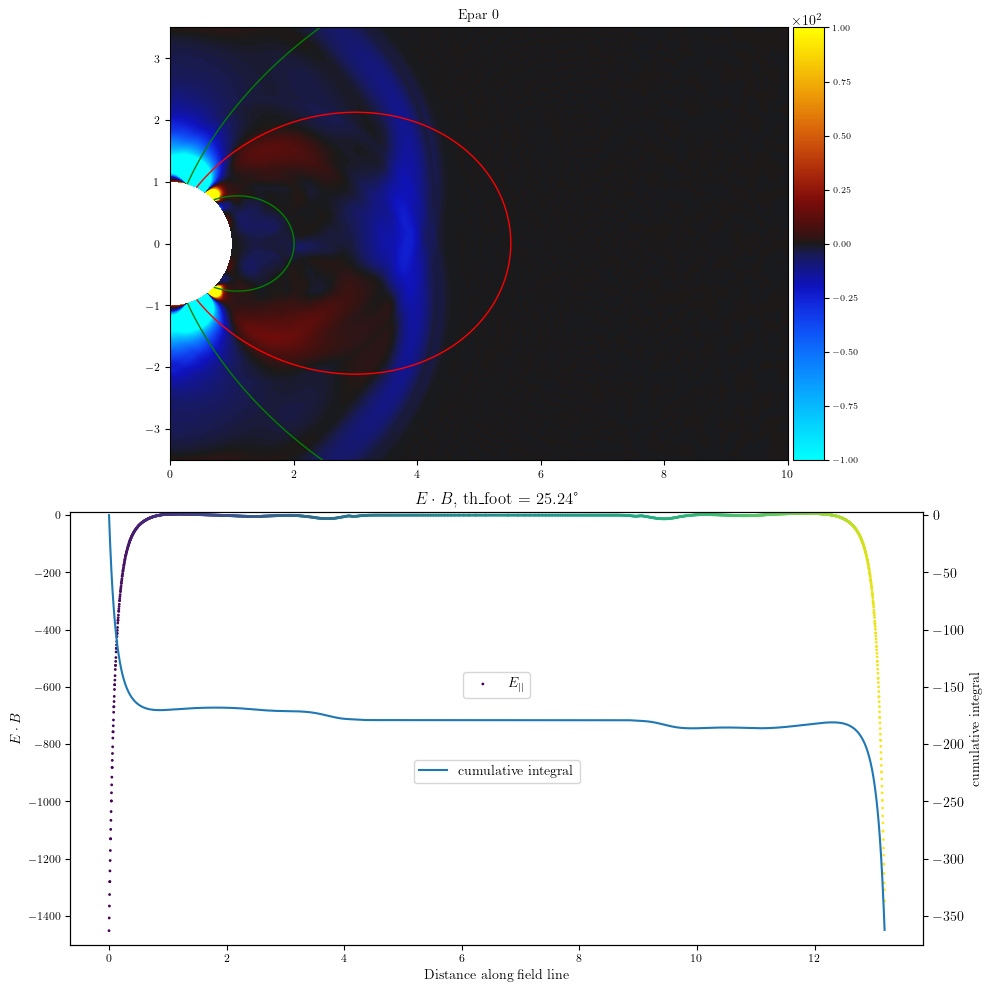

In [5]:
bfig.update_fig(10)

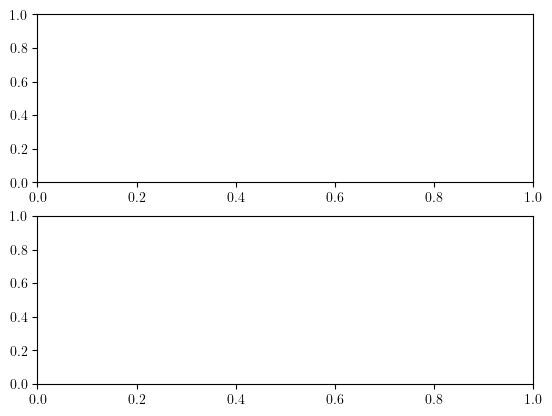

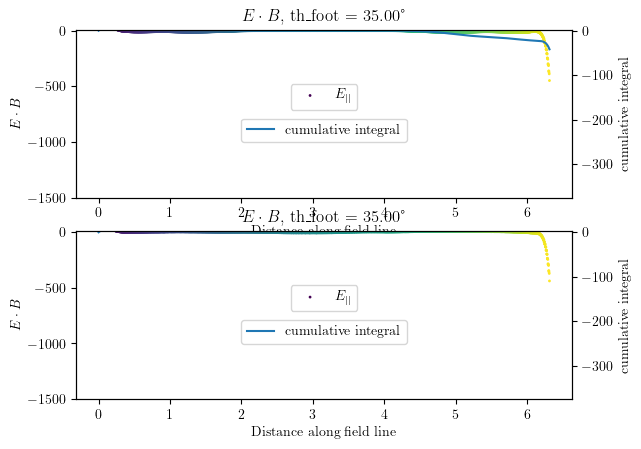

In [42]:
fig,axes = plt.subplots(2,1)
plt.ioff()
ax1 = axes[0]
ax2 = axes[1]
Epar = lambda data: (data.E1*data.B1 + data.E2*data.B2 + data.E3*data.B3) / np.sqrt(data.B1**2 + data.B2**2 + data.B3**2)
Epar_line = integrate_data_fld_line(data_mag,th,Epar,val_label = "$E_{||}$",int_label = "cumulative integral")

data_mag.load(5)
# Epar_line = integrate_data_fld_line(data_mag,th,Epar,val_label = "$E_{||}$",int_label = "cumulative integral")

f = Epar_line(ax1)
data_mag.load(10)
# Epar_line = integrate_data_fld_line(data_mag,th,Epar,val_label = "$E_{||}$",int_label = "cumulative integral")

g = Epar_line(ax2)

plt.show(fig)

In [112]:
def convert_to_index1(ax_index,value,data):
        # takes an x1,x2 (x3) value and converts it into an index on the grid
        lower = data.conf["lower"][ax_index]
        N = data.conf["N"][ax_index]
        downsample = data.conf["downsample"]
        size = data.conf["size"][ax_index]

        index = (value-lower)*N/(size*downsample)
        return int(round(index)) # as its an index
r = 10
th = 90*np.pi/180
r_in = convert_to_index1(1,np.log(r),data_mag)
th_in=convert_to_index1(0,th,data_mag)

x = data_mag.x1[th_in,r_in]
y = data_mag.x2[th_in,r_in]
r_new = np.sqrt(x**2 + (y**2))
th_new = np.arctan2(y,x)+np.pi/2

print("original r,th:  ",r,th)
print("indices:        ",r_in,th_in)
print("x,y:            ",x,y)
print("r,th at indices",r_new,th_new)
print(data_mag._rv[th_in,r_in],data_mag._thetav[th_in,r_in])



original r,th:   10 1.5707963267948966
indices:         751 512
x,y:             10.022233 -0.0076886127
r,th at indices 10.022236 1.5700293
10.037134201152243 1.5723319804496578


In [111]:
np.arctan2(0,3)

np.float64(0.0)

IndexError: invalid index to scalar variable.

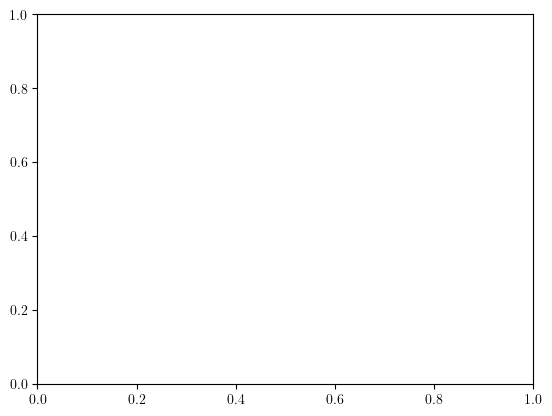

In [25]:
fig,ax = plt.subplots()

y = data_mag.particle_series(0,"time")
x = np.linspace(0,len(y),len(y))
ax.plot(x,y)
plt.show()
